In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
test_cases = pd.read_csv('tests/test_cases_hamming.csv')
test_cases.head()

,Error Rate,Length,Original,Encoded,Noisy,Errors
0,0.1,5,apple,1100110110100100011110000000000111100000001100...,1100110110101100011110000000000111100000001101...,5
1,0.1,6,banana,1100110010101011001101101001110011000101101100...,1101110010101011000101101001110010000101101100...,7
2,0.1,6,cherry,1100110100001111001101110000110011001001010001...,1100111000001111001101110100110011001001000001...,4
3,0.1,6,grapes,1100110000111100011110101010110011011010010001...,1101110000101100011110100010110011111010010011...,9
4,0.1,9,kiwifruit,1100110011001111001100011001000111100011111100...,1100100011000110001100111001100111100011111100...,20


In [28]:

hamming = pd.read_csv("results/results.csv")
hamming['Precision'] = hamming['Precision']*100

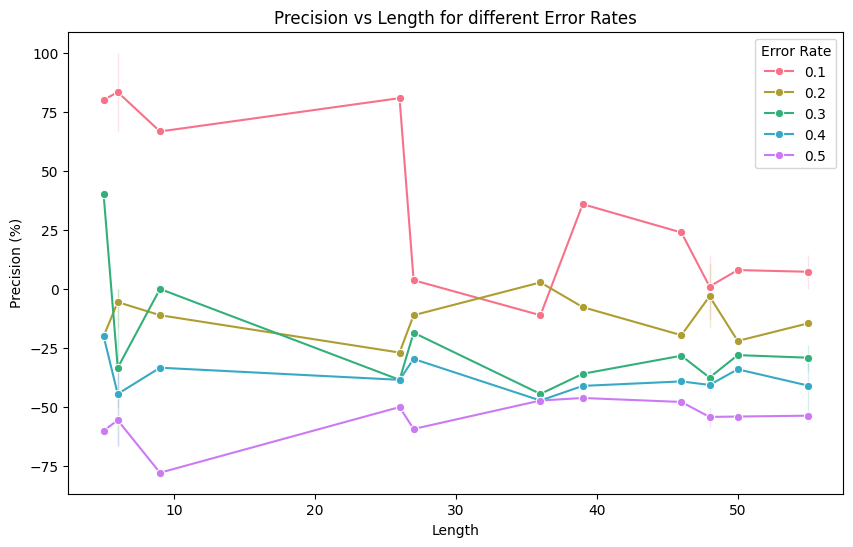

In [29]:

# Load the data


# Define a custom color palette
custom_palette = sns.color_palette("husl", hamming["Error Rate"].nunique())

# Create the line plot
plt.figure(figsize=(10, 6))
line = sns.lineplot(
    data=hamming,
    x="Length",
    y="Precision",
    hue="Error Rate",
    palette=custom_palette,
    marker="o",
)

# Add labels and title
plt.xlabel("Length")
plt.ylabel("Precision (%)")
plt.title("Precision vs Length for different Error Rates")
plt.legend(title="Error Rate")

#dpi = 300
plt.savefig('results/precision_vs_length.png', dpi=300)

# Show the plot
plt.show()

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_9546/3623082630.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Error Rate")


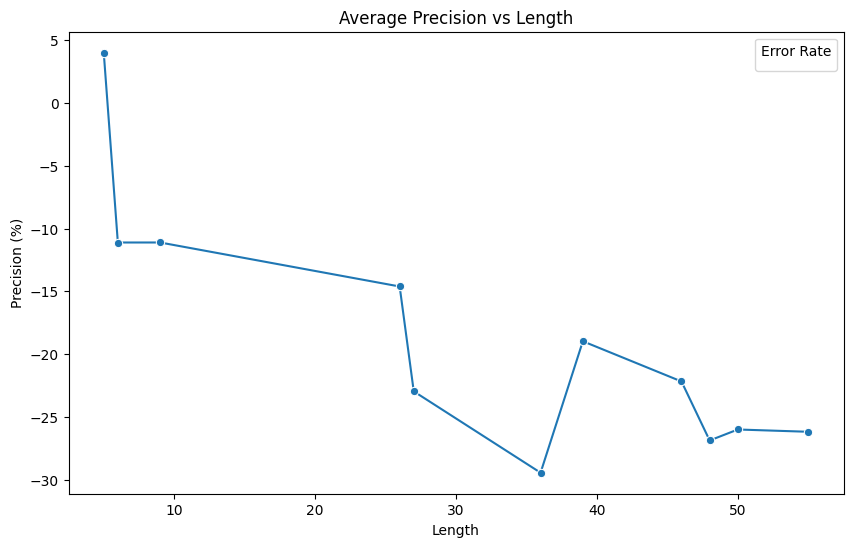

In [35]:
avg_precision = hamming.groupby('Length')['Precision'].mean().reset_index()

plt.figure(figsize=(10, 6))
line = sns.lineplot(
    data=avg_precision,
    x="Length",
    y="Precision",
    marker="o",
)

# Add labels and title
plt.xlabel("Length")
plt.ylabel("Precision (%)")
plt.title("Average Precision vs Length")
plt.legend(title="Error Rate")
